In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from IPython.display import clear_output
import random
import os
from scipy import stats
import seaborn as sns 
from AUGM_TS import Augmentator
#import AUGM_v

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

SEED = 42
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(SEED)

In [19]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print("device is:",device)

device is: cpu


In [20]:
training_set = pd.read_csv('weeks_ds.csv', index_col='week')

In [21]:
goods = training_set.sum().sort_values()[-50:].index.values

In [22]:
training_set = training_set[goods]

In [23]:
training_set

,FOODS_2_128,FOODS_3_412,HOUSEHOLD_1_521,FOODS_3_764,FOODS_2_276,FOODS_3_288,FOODS_2_197,FOODS_3_458,FOODS_3_498,FOODS_3_389,...,FOODS_3_120,FOODS_3_202,FOODS_3_226,FOODS_3_694,FOODS_3_714,FOODS_3_587,FOODS_3_555,FOODS_3_252,FOODS_3_586,FOODS_3_090
week,,,,,,,,,,,,,,,,,,,,,
0,582,460,307,0,945,0,992,632,740,490,...,0,627,1168,1532,1142,1804,1718,1468,2853,5922
1,496,207,309,0,1054,0,881,669,1005,586,...,0,770,1157,1563,1318,2936,2007,1656,3268,3139
2,611,210,324,0,922,0,664,736,684,572,...,0,863,1320,1756,1533,2408,2136,2060,3613,0
3,386,307,295,0,853,0,503,718,566,404,...,0,939,1147,1537,1375,2521,1933,1798,3250,0
4,497,380,361,0,743,0,569,620,648,476,...,0,976,1199,1525,1379,2493,2067,1913,3319,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,440,487,373,432,390,1053,414,709,444,809,...,1794,1414,1361,1423,1417,1611,1715,2041,2955,4007
273,465,370,374,366,319,1049,408,697,312,725,...,1829,1230,1144,1389,1390,1504,1605,1943,2762,3898
274,633,532,336,436,374,999,550,715,445,739,...,1925,1256,1318,1506,1533,1481,1655,2059,3014,3804


In [24]:
train = training_set[:int(0.7 * len(training_set))]
valid = training_set[int(0.7 * len(training_set)):int(0.85 * len(training_set))]
test = training_set[int(0.85 * len(training_set)):]

In [25]:
train.shape, valid.shape, test.shape

((193, 50), (42, 50), (42, 50))

## Augmentation

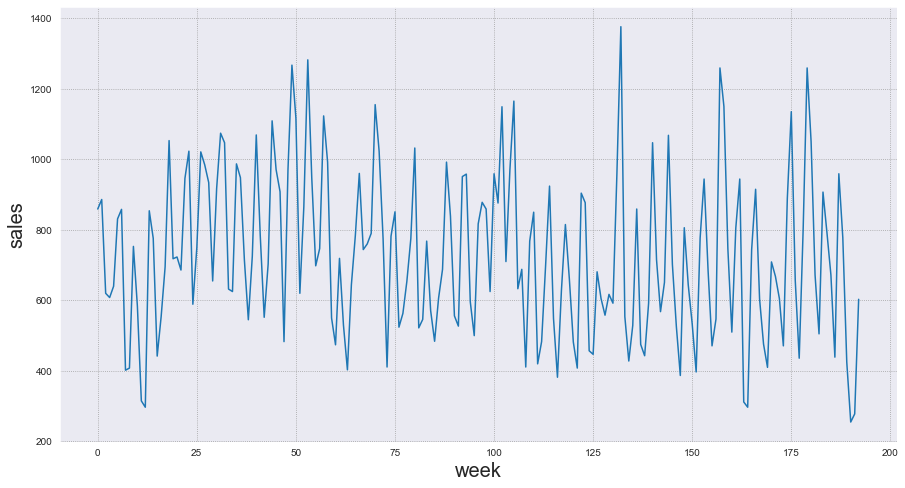

In [26]:
ts_test = train.iloc[:, 13].values

plt.figure(figsize=(15 , 8))

plt.plot(
    ts_test
)

plt.xlabel('week', fontsize=20)
plt.ylabel('sales', fontsize=20)
plt.show()

In [27]:
augm = Augmentator()

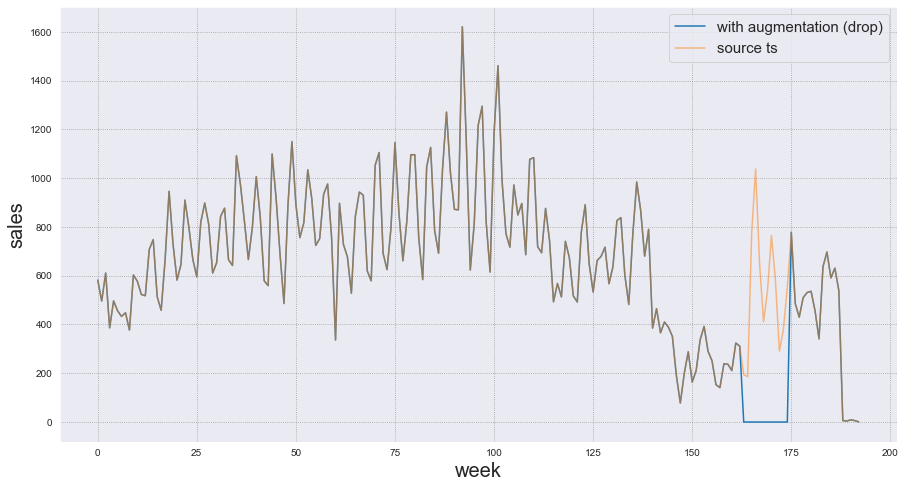

In [28]:
plt.figure(figsize=(15, 8))

plt.plot(
    augm.add_drops(train.iloc[:, 0].values),
    label='with augmentation (drop)'
)

plt.plot(
    train.iloc[:, 0].values,
    label='source ts',
    alpha=0.5
)

plt.xlabel('week', fontsize=20)
plt.ylabel('sales', fontsize=20)
plt.legend(fontsize=15)
plt.show()

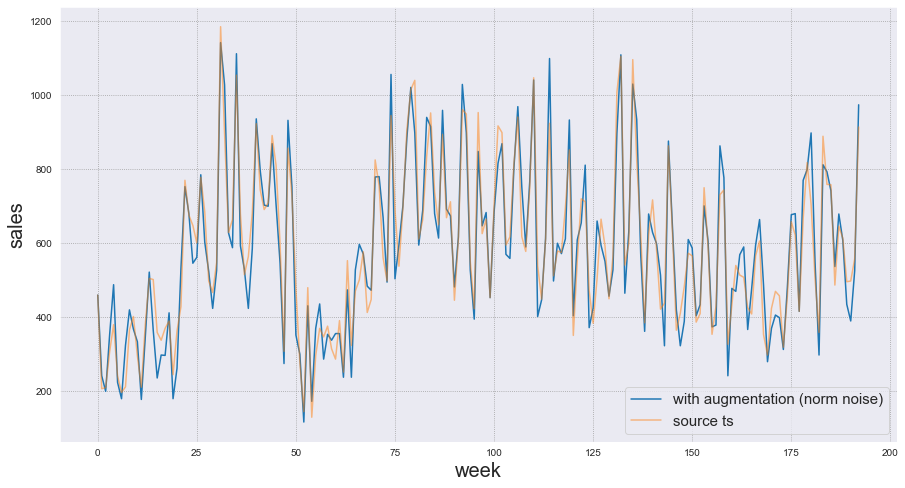

In [29]:
plt.figure(figsize=(15, 8))

plt.plot(
    augm.add_norm_noise(train.iloc[:, 1].values),
    label='with augmentation (norm noise)'
)

plt.plot(
    train.iloc[:, 1].values,
    label='source ts',
    alpha=0.5
)

plt.xlabel('week', fontsize=20)
plt.ylabel('sales', fontsize=20)
plt.legend(fontsize=15)
plt.show()

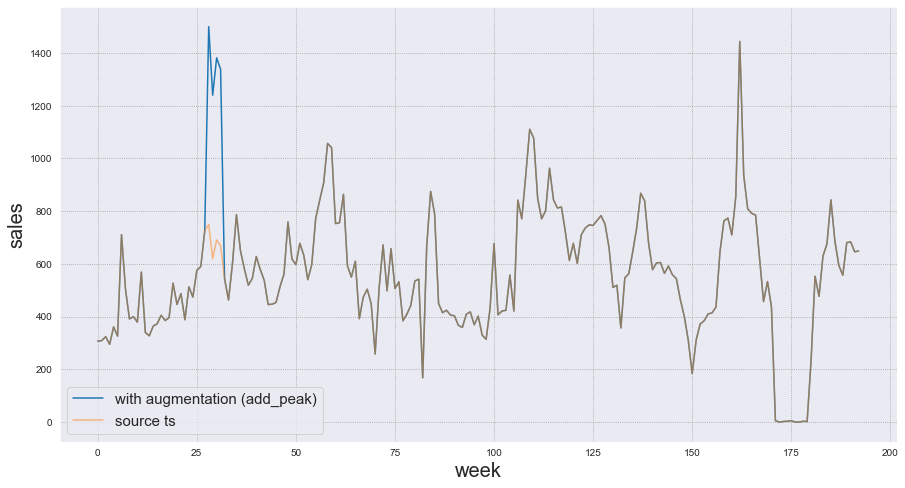

In [30]:
plt.figure(figsize=(15, 8))

plt.plot(
    augm.add_peak(train.iloc[:, 2].values),
    label='with augmentation (add_peak)'
)

plt.plot(
    train.iloc[:, 2].values,
    label='source ts',
    alpha=0.5
)

plt.xlabel('week', fontsize=20)
plt.ylabel('sales', fontsize=20)
plt.legend(fontsize=15)
plt.show()

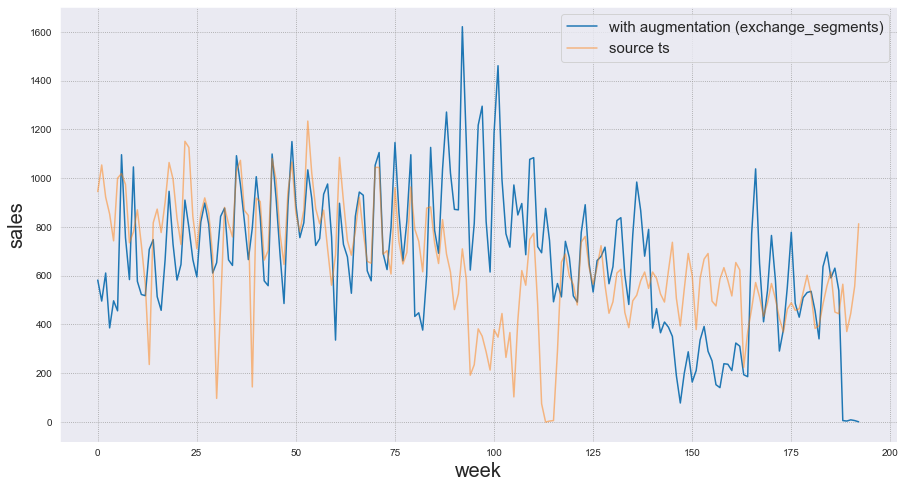

In [31]:
plt.figure(figsize=(15, 8))

plt.plot(
    augm.add_exchange(train.iloc[:, 0].values),
    label='with augmentation (exchange_segments)'
)

plt.plot(
    train.iloc[:, 4].values,
    label='source ts',
    alpha=0.5
)

plt.xlabel('week', fontsize=20)
plt.ylabel('sales', fontsize=20)
plt.legend(fontsize=15)
plt.show()

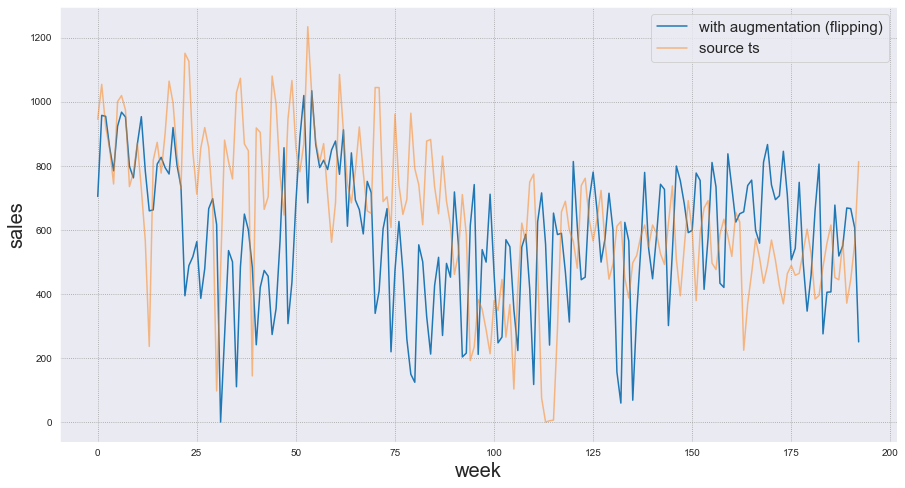

In [32]:
plt.figure(figsize=(15, 8))

plt.plot(
    augm.add_flipping(train.iloc[:, 1].values),
    label='with augmentation (flipping)'
)

plt.plot(
    train.iloc[:, 4].values,
    label='source ts',
    alpha=0.5
)

plt.xlabel('week', fontsize=20)
plt.ylabel('sales', fontsize=20)
plt.legend(fontsize=15)
plt.show()

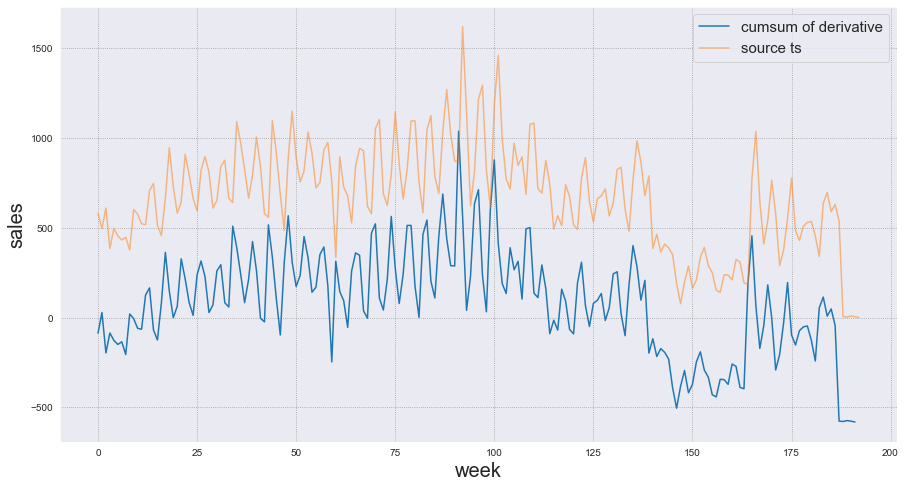

In [33]:
plt.figure(figsize=(15, 8))


plt.plot(
    np.cumsum(np.diff(train.iloc[:, 0].values)),
    label='cumsum of derivative'
)

plt.plot(
    train.iloc[:, 0].values,
    label='source ts',
    alpha=0.5
)

plt.xlabel('week', fontsize=20)
plt.ylabel('sales', fontsize=20)
plt.legend(fontsize=15)
plt.show()

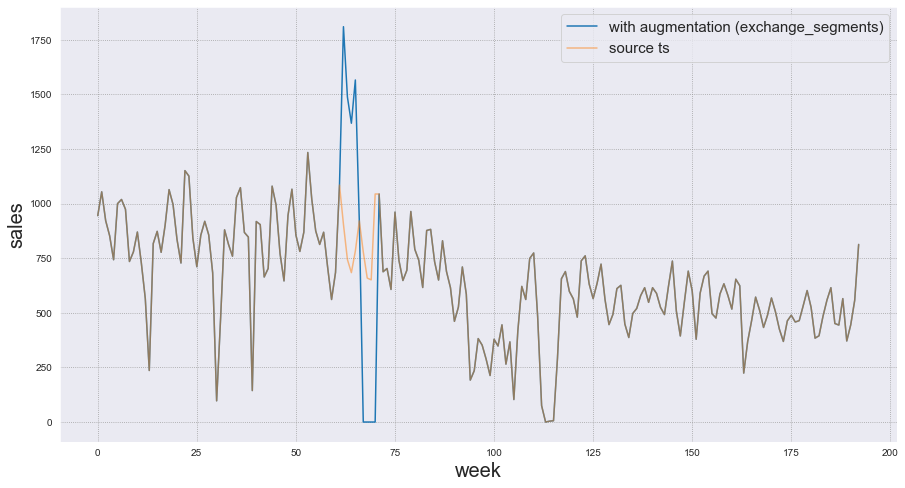

In [34]:
plt.figure(figsize=(15, 8))

plt.plot(
    augm.add_smart_peak(train.iloc[:, 4].values),
    label='with augmentation (exchange_segments)'
)

plt.plot(
    train.iloc[:, 4].values,
    label='source ts',
    alpha=0.5
)

plt.xlabel('week', fontsize=20)
plt.ylabel('sales', fontsize=20)
plt.legend(fontsize=15)
plt.show()

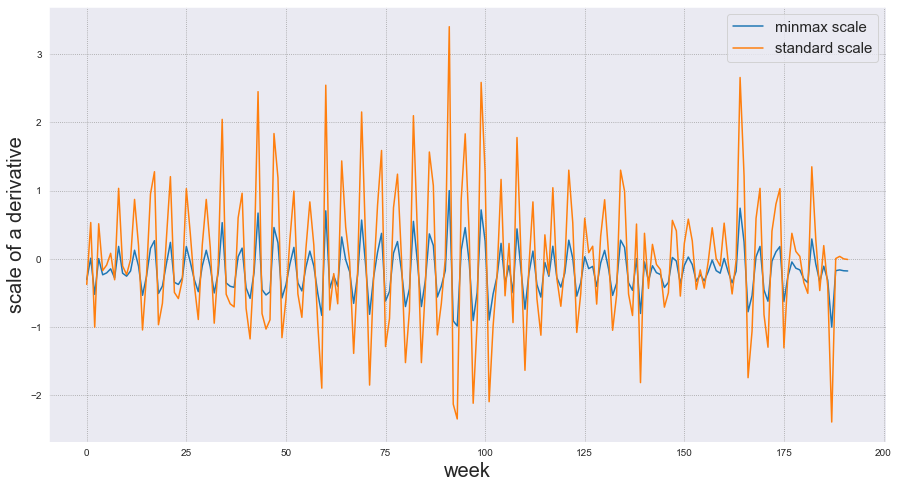

In [35]:
sc_ex = MinMaxScaler((-1, 1))
scaled_1 = sc_ex.fit_transform(np.array([np.diff(train.iloc[:, 0].values)]).reshape(-1, 1))

sc_ex2 = StandardScaler()
scaled_2 = sc_ex2.fit_transform(np.array([np.diff(train.iloc[:, 0].values)]).reshape(-1, 1))

plt.figure(figsize=(15, 8))



plt.plot(
    scaled_1.reshape(-1),
    label='minmax scale'
)


plt.plot(
    scaled_2.reshape(-1),
    label='standard scale'
)

plt.xlabel('week', fontsize=20)
plt.ylabel('scale of a derivative', fontsize=20)
plt.legend(fontsize=15)
plt.show()

In [36]:
cols = training_set.columns

training_set_augm_peak = pd.DataFrame()

for col in cols:
    training_set_augm_peak[col] = augm.add_peak(train[col])

In [37]:
cols = training_set.columns

training_set_augm_drop = pd.DataFrame()

for col in cols:
    training_set_augm_drop[col] = augm.add_drops(train[col])

In [38]:
cols = training_set.columns

training_set_augm_drop1 = pd.DataFrame()

for col in cols:
    training_set_augm_drop1[col] = augm.add_drops(train[col])

In [39]:
cols = training_set.columns

training_set_augm_noise = pd.DataFrame()

for col in cols:
    training_set_augm_noise[col] = augm.add_norm_noise(train[col])

In [40]:
cols = training_set.columns

training_set_augm_exch = pd.DataFrame()

for col in cols:
    training_set_augm_exch[col] = augm.add_exchange(train[col])

In [41]:
cols = training_set.columns

training_set_augm_smart_peak = pd.DataFrame()

for col in cols:
    training_set_augm_smart_peak[col] = augm.add_smart_peak(train[col])

In [42]:
cols = training_set.columns

training_set_augm_all = pd.DataFrame()

for col in cols:
    training_set_augm_all[col] = augm.add_peak(augm.add_drops(augm.add_norm_noise(augm.add_exchange(augm.add_smart_peak(train[col])))))

In [43]:
train_sample_wa = augm.make_ds([train, training_set_augm_all])

In [44]:
train_sample = augm.make_ds([train])

In [45]:
valid_sample = augm.make_ds([valid])

In [46]:
test_sample = augm.make_ds([test])

In [47]:
valid_sample.shape, train_sample.shape

((41, 50), (192, 50))

In [245]:
TrainX.shape[0]

359

## Train model

In [246]:
n_features = TrainX.shape[2] # number of timeseries 
hidden_dim = 4 * n_features # hidden dim (was = 6 * ...)
output_length = 4 # number of days to predict 

model = Seq2Seq(seq_length, n_features, hidden_dim, output_length)
model = model.to(device)

model

Seq2Seq(
  (encoder): Encoder(
    (rnn1): LSTM(50, 200, num_layers=3, batch_first=True, dropout=0.35)
  )
  (decoder): Decoder(
    (rnn1): LSTM(50, 200, num_layers=3, batch_first=True, dropout=0.35)
    (output_layer): Linear(in_features=200, out_features=50, bias=True)
  )
)

In [247]:
from tqdm import tqdm

In [248]:
#train.shape

In [249]:
#weights = stats.trim_mean(train.values, 0.2, axis=0)

In [250]:
#weights = torch.Tensor(weights)

In [191]:
#def weighted_mse_loss(input, target, weight):
#        return (weight * (input - target) ** 2).mean()

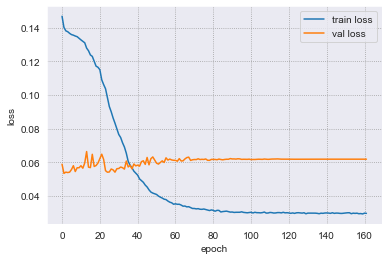

Epoch 161: train loss 0.029780127840962334 val loss 0.06195256975479424


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 332/359 [00:10<00:00, 32.47it/s]

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=5e-3)
criterion = torch.nn.MSELoss().to(device)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=10, factor=0.5 ,min_lr=1e-7, eps=1e-08)
best_loss = 50
n_epochs = 200

history = dict(train=[], val=[])

for epoch in range(n_epochs):
    model = model.train()

    train_losses = []
    for X_train, y_train in tqdm(train_loader):
        X_train = X_train.to(device)
        y_train = y_train.to(device)
        #seq_inp = TrainX[i,:,:]
        #seq_true = Trainy[i,:,:]
        prevs_y = X_train[:, -1:, :]
        #print(X_train.shape)
        #print(X_train)
        #print(prevs_y)
        #break

        #print(f'prev_y {seq_inp[seq_length-1:seq_length,:]}')
        seq_pred = model(X_train, prevs_y)#seq_inp[seq_length-1:seq_length,:])
        #print(seq_pred.shape)
        #print(y_train.shape)
        #print(seq_pred.shape)
        #print(y_train.shape)
        optimizer.zero_grad()
        
        loss = criterion(seq_pred, y_train)
        
        #print(loss.item())
        

        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1)
        optimizer.step()

        train_losses.append(loss.item())

    val_losses = []
    model = model.eval()
    with torch.no_grad():
        for X_valid, y_valid in valid_loader:
            X_valid = X_valid.to(device)
            y_valid = y_valid.to(device)
            #seq_inp = ValidX[i,:,:]
            #seq_true = Validy[i,:,:]
            prevs_y = X_valid[:, -1:, :]

            seq_pred = model(X_valid,prevs_y)

           
            loss = criterion(seq_pred, y_valid)
            val_losses.append(loss.item())

    train_loss = np.mean(train_losses)
    val_loss = np.mean(val_losses)

    history['train'].append(train_loss)
    history['val'].append(val_loss)

    

    
    
    clear_output(True)

    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(history['train'], label='train loss')
    plt.plot(history['val'], label='val loss')

    plt.legend()
    plt.show()
    
    if val_loss < best_loss:
        best_loss = val_loss
        torch.save(model.state_dict(), 'Models/Augm/model_all_1ts.pt')
        print("saved best model epoch:",epoch,"val loss is:",val_loss)
    
    print(f'Epoch {epoch}: train loss {train_loss} val loss {val_loss}')
    
    scheduler.step(val_loss)

In [67]:
def MSE(x, y):
    return np.mean((x - y) ** 2)

In [58]:
naive_pred = sc.transform(np.zeros(Validy.reshape(-1, 50).shape))

In [59]:
naive_pred_base = sc.transform([[0] * 50])

In [64]:
weighted_mse_loss(Validy.reshape(-1, 50).detach().numpy(), naive_pred, weights)

tensor(53.9017, dtype=torch.float64)

In [68]:
MSE(Validy.reshape(-1, 50).detach().numpy(), naive_pred)

0.057462906714610504

### Gread search 

In [ ]:
path = 'Model_gs/'
h_dims = [6, 8, 10, 12]
lrs = [5e-3, 1e-3]

df = pd.DataFrame({'hd' : [], 'lr' : [], 'epoch' : [], 'val loss' : []})

best_loss = 0.0520

for hd in h_dims:
    for lr in tqdm(lrs):
        
        n_features = TrainX.shape[2] # number of timeseries 
        hidden_dim = hd * n_features # hidden dim
        output_length = 4 # number of days to predict 

        model = Seq2Seq(seq_length, n_features, hidden_dim, output_length)
        model = model.to(device)
        
        
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        criterion = torch.nn.MSELoss().to(device)
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=10, factor=0.5 ,min_lr=1e-7, eps=1e-08)
        n_epochs = 175

        history = dict(train=[], val=[])

        for epoch in range(n_epochs):
            model = model.train()

            train_losses = []
            for X_train, y_train in train_loader:
                X_train = X_train.to(device)
                y_train = y_train.to(device)
                #seq_inp = TrainX[i,:,:]
                #seq_true = Trainy[i,:,:]
                prevs_y = X_train[:, -1:, :]
                #print(X_train.shape)
                #print(X_train)
                #print(prevs_y)
                #break

                #print(f'prev_y {seq_inp[seq_length-1:seq_length,:]}')
                seq_pred = model(X_train, prevs_y)#seq_inp[seq_length-1:seq_length,:])
                #print(seq_pred.shape)
                #print(y_train.shape)
                #print(seq_pred.shape)
                #print(y_train.shape)
                optimizer.zero_grad()

                loss = criterion(seq_pred, y_train)

                #print(loss.item())


                loss.backward()

                torch.nn.utils.clip_grad_norm_(model.parameters(), 1)
                optimizer.step()

                train_losses.append(loss.item())

            val_losses = []
            model = model.eval()
            with torch.no_grad():
                for X_valid, y_valid in valid_loader:
                    X_valid = X_valid.to(device)
                    y_valid = y_valid.to(device)
                    #seq_inp = ValidX[i,:,:]
                    #seq_true = Validy[i,:,:]
                    prevs_y = X_valid[:, -1:, :]

                    seq_pred = model(X_valid,prevs_y)


                    loss = criterion(seq_pred, y_valid)
                    val_losses.append(loss.item())

            train_loss = np.mean(train_losses)
            val_loss = np.mean(val_losses)

            history['train'].append(train_loss)
            history['val'].append(val_loss)





            #clear_output(True)

            if val_loss < best_loss:
                best_loss = val_loss
                torch.save(model.state_dict(), path + 'best_model.pt')
                print("saved best model epoch:",epoch,"val loss is:",val_loss)
                
                df_cur = pd.DataFrame({'hd' : [hd], 'lr' : [lr], 'epoch' : [epoch], 'val loss' : [val_loss]})
                df = df.append(df_cur)

            #print(f'Epoch {epoch}: train loss {train_loss} val loss {val_loss}')

            scheduler.step(val_loss)
        
        

  0%|                                                                                                                             | 0/2 [00:00<?, ?it/s]/var/folders/zw/lhksvp0s5qzg64r3f5t9fkj00000gn/T/ipykernel_76852/2397481146.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = Variable(torch.tensor(X))
/var/folders/zw/lhksvp0s5qzg64r3f5t9fkj00000gn/T/ipykernel_76852/2397481146.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return X, Variable(torch.tensor(self.y[index]))
 50%|███████████████████████████████████████████████████████▌                                                       | 1/2 [2:18:29<2:18:29, 8309.78s/it]